In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 

Text(0, 0.5, 'y=relu(x)')

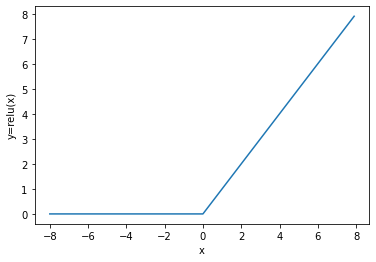

In [15]:
x = torch.arange(-8,8,0.1,requires_grad=True)
y = x.relu()
plt.plot(x.detach().numpy(),y.detach().numpy())
plt.xlabel('x')
plt.ylabel('y=relu(x)')

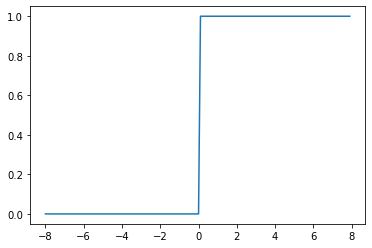

In [16]:
y.sum().backward()
xg = x.grad
plt.plot(x.detach().numpy(),xg.detach().numpy())

# 实现多层感知机

In [2]:
# 导入数据
# 加载数据
def fashion_mnist_dataload(batch_size):
    mnist_train = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMnist', train=True, download=True,transform=transforms.ToTensor())
    mnist_test =  torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMnist',train=False, download=True,transform=transforms.ToTensor())
    train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=0)
    test_iter =  torch.utils.data.DataLoader(mnist_test, batch_size=batch_size,shuffle=True, num_workers=0)
    return train_iter, test_iter

In [7]:
batch_size=256
train_iter, test_iter = fashion_mnist_dataload(batch_size)

In [24]:
# 定义模型参数
num_inputs, num_outputs, num_hidden = 784, 10, 256
w1 = torch.normal(0, 0.01,(num_inputs,num_hidden), dtype=torch.float)
b1 = torch.zeros((1,num_hidden), dtype=torch.float)
w2 = torch.normal(0,0.01,(num_hidden,num_outputs), dtype=torch.float)
b2 = torch.zeros((1,num_outputs), dtype=torch.float)

params = [w1,w2,b1,b1]
for param in params:
    param.requires_grad_(requires_grad=True)

In [10]:
# 定义激活函数
def relu(x):
    return torch.max(input=x,other=torch.tensor(0.0))

In [12]:
#定义模型
def net(x):
    x = x.view(-1,num_inputs)
    h1 = x.mm(w1) + b1
    o1 = relu(h1)
    y = o1.mm(w2) + b2
    return y 

In [51]:
# 测试模型
for test_x, test_y in train_iter:
    test_y_hat = net(test_x[0])
    break
print(test_y_hat)

tensor([[ 0.4455,  0.2010,  0.2996,  0.3113,  0.3656, -0.6516,  0.3247, -0.6779,
         -0.0196, -0.4762]], grad_fn=<AddBackward0>)


In [13]:
# 定义损失函数
loss = torch.nn.CrossEntropyLoss()

In [52]:
# 评估模型的准确度
def evaluate_accuracy(data_set,net):
    acc_num, n=0, 0
    for X,y in data_set:
        y_hat = net(X)
        acc_num += (y_hat.argmax(dim=1) == y).sum().item()
        n += y.shape[0]
    return acc_num / n

In [55]:
def train_ch3(net, train_iter, test_iter, params, lr, num_epochs, batch_size, loss):
    for epoch in range(num_epochs):
        train_loss, train_acc, n = 0.0, 0.0, 0
        for X,y in train_iter:
            # 前向传播
            y_hat = net(X)
            #计算损失值
            l = loss(y_hat,y)
            # 反向传播
            l.backward()
            # 更新梯度
            for param in params:
                param.data -= lr * param.grad.data / batch_size
            # 梯度清零 
            for param in params:
                param.grad.data.zero_()
            n += y.shape[0] # 计算有多少样本 
            train_loss += l # 计算着一个epoch 的损失值
            train_acc += (y_hat.argmax(dim=1) == y ).sum().item() # 计算这一个epoch的训练集准确率
        test_acc = evaluate_accuracy(test_iter,net)
        print('num_epochs %d, loss %.4f, train acc %.3f, test acc %.3f'% (epoch + 1, train_loss/num_epochs, train_acc / n, test_acc))

In [59]:
# 
lr = 0.05
num_epochs = 20
loss = torch.nn.CrossEntropyLoss()
train_ch3(net, train_iter, test_iter, params, lr, num_epochs, batch_size, loss)

num_epochs 1, loss 13.4767, train acc 0.634, test acc 0.625
num_epochs 2, loss 13.4114, train acc 0.635, test acc 0.626
num_epochs 3, loss 13.3486, train acc 0.636, test acc 0.627
num_epochs 4, loss 13.2877, train acc 0.637, test acc 0.628
num_epochs 5, loss 13.2268, train acc 0.638, test acc 0.629
num_epochs 6, loss 13.1713, train acc 0.639, test acc 0.629
num_epochs 7, loss 13.1088, train acc 0.639, test acc 0.630
num_epochs 8, loss 13.0527, train acc 0.640, test acc 0.630
num_epochs 9, loss 12.9977, train acc 0.641, test acc 0.630
num_epochs 10, loss 12.9395, train acc 0.642, test acc 0.631
num_epochs 11, loss 12.8853, train acc 0.642, test acc 0.631
num_epochs 12, loss 12.8306, train acc 0.642, test acc 0.632
num_epochs 13, loss 12.7790, train acc 0.643, test acc 0.633
num_epochs 14, loss 12.7240, train acc 0.643, test acc 0.634
num_epochs 15, loss 12.6752, train acc 0.644, test acc 0.634
num_epochs 16, loss 12.6217, train acc 0.645, test acc 0.634
num_epochs 17, loss 12.5734, trai

In [50]:
n=0
for X, y in test_iter:
    n += y.shape[0]
    #break
print(n) 

10000
